# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

## 1. 분석의 목적과 변수 확인

## 2. 데이터 전체적으로 살펴보기

## 3. 데이터의 개별 속성 파악하기

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?



#### 과제의 결론 - 유의미한 Feature : `Cabin`, `Fare`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
titanic_df = pd.read_csv("./train.csv")
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
titanic_df.describe()

# SibSp, Parch, Fare에 대한 이상치 분석이 필요해보인다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


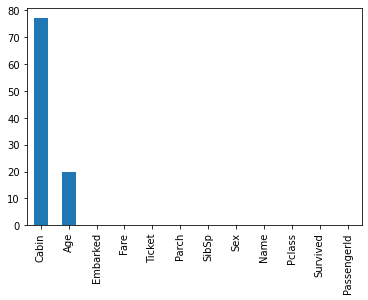

In [32]:
s = titanic_df.isnull().sum()
total = titanic_df.isnull().count()
percent = (s/total * 100).sort_values(ascending=False)
# percent
# 결측치 존재 : Cabin, Age, Embarked
percent.plot(kind="bar")
plt.show()

In [74]:
# 결측치 간의 상관관계. .
# Cabin은 Cabin number 인걸로 보아 Cabin을 배정 못 받았거나, 실수로 빠트렸을 수 있다고 생각된다.
titanic_null_group = titanic_df.columns[titanic_df.isnull().any()]
titanic_df['newCabin'] = [0 if x else 1 for x in titanic_df['Cabin'].isnull()] # 'Cabin' null 여부를 0,1 구분
titanic_df['newAge'] = [0 if x else 1 for x in titanic_df['Age'].isnull()] # 'Cabin' null 여부를 0,1 구분
# titanic_df[['newCabin', 'newAge']].corr()
titanic_df.corr()

# (newCabin, Pclass), (Fare, Pclass), (newCabin, Fare), (Parch, SibSp) 순으로 연관성이 높은 결과가 나왔다.


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,newCabin,newAge
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.019919,0.020167
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.316912,0.092197
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.725541,-0.172933
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.249732,NaN
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.040460,-0.018958
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.036987,0.124104
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.482075,0.100707
newCabin,0.019919,0.316912,-0.725541,0.249732,-0.040460,0.036987,0.482075,1.000000,0.144111
newAge,0.020167,0.092197,-0.172933,NaN,-0.018958,0.124104,0.100707,0.144111,1.000000


In [116]:
embarked_cabin = titanic_df[['newCabin','Embarked']].groupby(['Embarked'])
embarked_cabin.sum()/embarked_cabin.count() 
# Cabin을 가지고 있는 비율 C > S > Q
# 분석 : C > S > Q 순으로 선박지에서 탑승한 사람들이 Cabin을 많이 배정 받았다는 정도로 생각할 수 있다.

# embarked_age = titanic_df[['newAge','Embarked']].groupby(['Embarked'])
# embarked_age.sum()/embarked_age.count() # Age을 가지고 있는 비율
# 분석 : 크게 연관성이 없는 듯 하다.

,newCabin
Embarked,
C,0.410714
Q,0.051948
S,0.200311


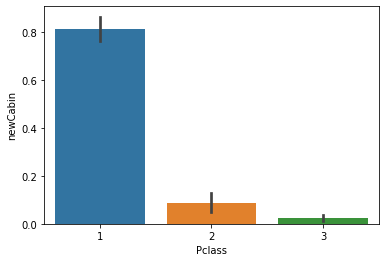

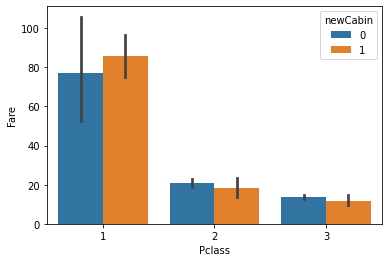

In [31]:
sns.barplot(x="Pclass", y="newCabin",data=titanic_df)
plt.show()
# Pclass 1 > 2 > 3 순으로 Cabin을 가진 인원의 비율이 높다는 것을 알 수 있다.

sns.barplot(x="Pclass", y="Fare",hue="newCabin",data=titanic_df)
plt.show()

# 이러한 결과로 Pclass에 따라 1 > 2 > 3 순으로 Fare가 전반적으로 높은 것을 알 수 있으며,
# 같은 Pclass 내에서 Cabin의 유무에 따라 Fare의 차이가 발생하는 것은 아닌 것으로 보아 
# Cabin 변수의 결측은 MCAR(완전 무작위 결측) 유형이라고 판단할 수 있을 것 같다.

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

### 유의미한 Feature 리스트

- `charges`
- `bmi`
- `age`
- `smoker`

In [4]:
insurance_df = pd.read_csv('./insurance.csv')
# 상단값 확인
insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
# 하단값 확인
insurance_df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### 가설 세우기

1. 'age', 'bmi'가 높을수록, 그리고 'smoker' == yes 인 경우 'charges'가 높지 않을까?
2. sex=='male' 인 경우가 smoker의 비중이 높지 않을까?
3. 'children'이 많을 경우 더 높은 'charges'를 가지지 않을까?

### 데이터 변수 확인

In [50]:
insurance_df.info() # 데이터 변수 타입 확인

# object 형 : 'sex', 'smoker', 'region'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 전체적인 데이터 분석

In [56]:
male_cnt = insurance_df[insurance_df['sex']=='male'].count()[0]
female_cnt = insurance_df[insurance_df['sex']=='female'].count()[0]
print("male per : %f \nfemale per : %f" % (male_cnt/insurance_df.count()[0], female_cnt/insurance_df.count()[0]))

print("-> 성비가 거의 비슷하다")

male per : 0.505232 
female per : 0.494768
-> 성비가 거의 비슷하다


In [53]:
# 결측치 & 이상치 유무
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 결측치 확인

In [107]:
insurance_df.isnull().any()

# 결측치는 존재하지 않는다.

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [76]:
insurance_df.corr()
# (charges, age), (bmi, charges) 상관관계 분석 필요

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### 이상치 확인

In [56]:
sns.boxplot(x=insurance_df.columns, y="")

# children, charges 이상치 의심이 된다.

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

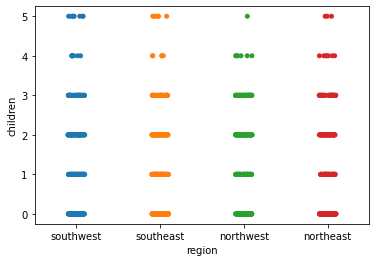

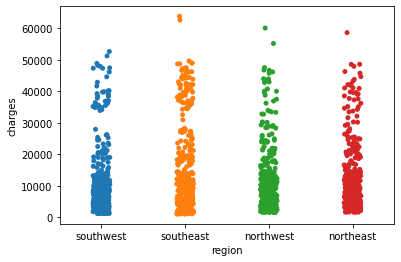

In [111]:
sns.stripplot(x="region", y="children", data=insurance_df)
plt.show()
# children은 골고루 분포되어 있음

sns.stripplot(x="region", y="charges", data=insurance_df)
plt.show()
# 50,000원 이상인 이상치가 소량 존재

### 데이터 상관관계 분석

#### (`smoker`,  sex) & `charges`

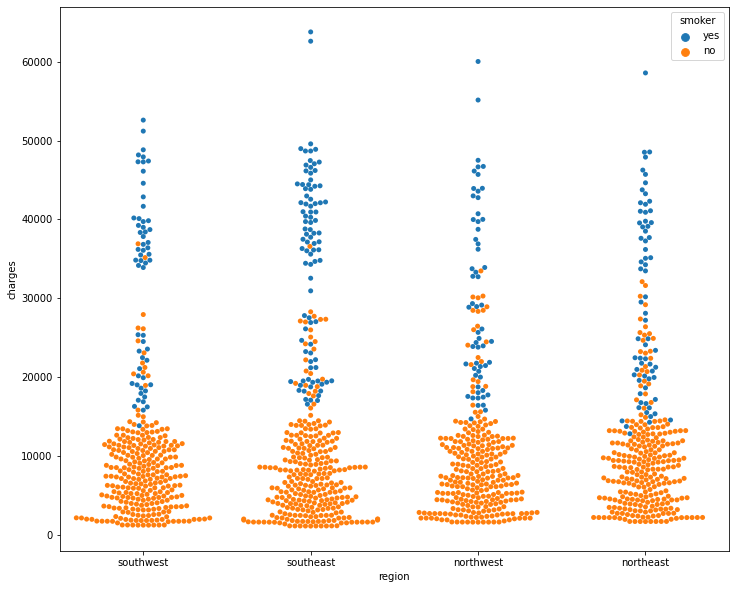

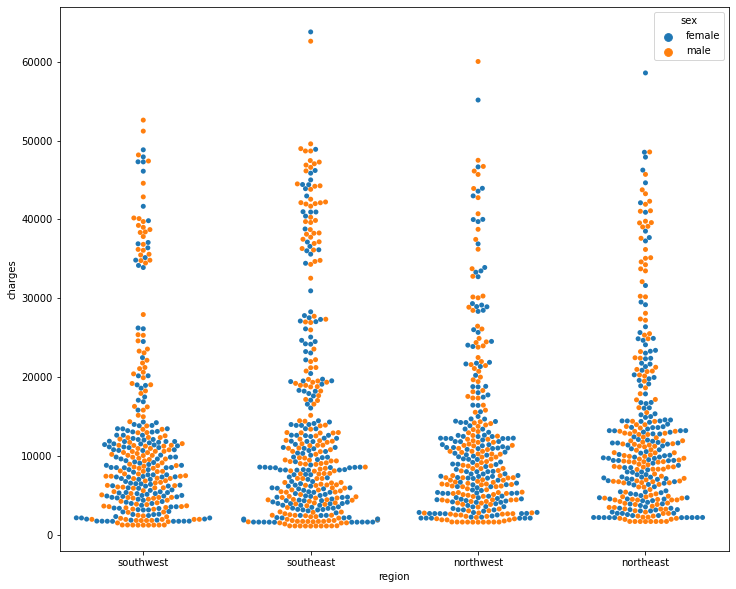

In [109]:
fig, ax = plt.subplots(figsize=(12,10))
sns.swarmplot(x="region", y="charges", data=insurance_df, hue="smoker")
plt.show()
# charges가 높은 집단은 대부분 흡연자라고 볼 수 있다.

fig, ax = plt.subplots(figsize=(12,10))
sns.swarmplot(x="region", y="charges", data=insurance_df, hue="sex")
plt.show()
# sex의 경우에는 골고루 분포되어 있다.

#### (sex, smoker) & age

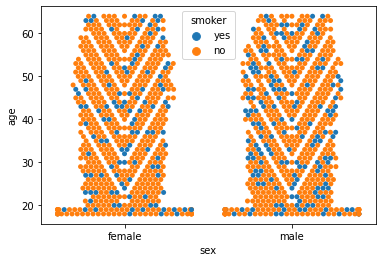

In [117]:
sns.swarmplot(x="sex", y="age", data=insurance_df, hue="smoker")
plt.show()

# male이 female 보다 흡연자 비율이 비교적 높은걸 알 수 있다.

#### `charges` & `age`

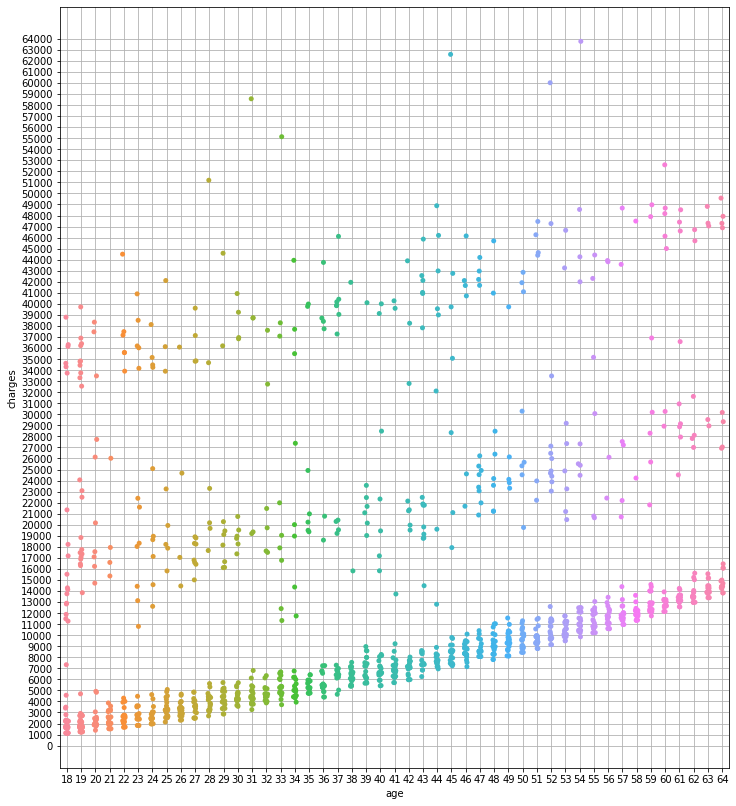

In [94]:
fig, ax = plt.subplots(figsize=(12,14))
sns.stripplot(x='age', y='charges', data=insurance_df)
plt.yticks([i for i in range(0,65000,1000)])
plt.grid()
plt.show()

# 결과를 통해서 다음의 3가지를 알 수 있다.
# 1. 전 연령에 걸쳐서 charges가 1,000~1,7000에 가장 많이 분포하는 것으로 보인다.
# 2. 연령이 증가할수록 charges도 비례하여 증가하는 것으로 확인된다.
# 3. charges가 높을수록 데이터 수가 감소하는 것으로 보인다.

#### `bmi` & `charges`

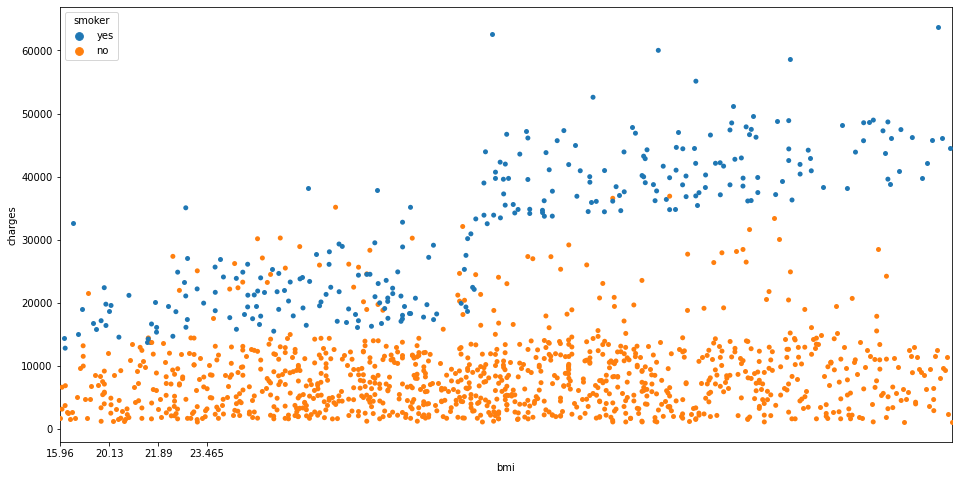

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
sns.stripplot(x='bmi', y='charges', data=insurance_df, hue="smoker")
plt.xticks([i for i in range(0,100,30)])
plt.show()

# **x축 ticks 오류 원인**을 모르겠음.
# bmi가 높은 표본일수록 charges가 높게 분포되는 것을 알 수 있다.
# smoker 여부와 bmi는 큰 연관이 없는 것 같이 보인다.

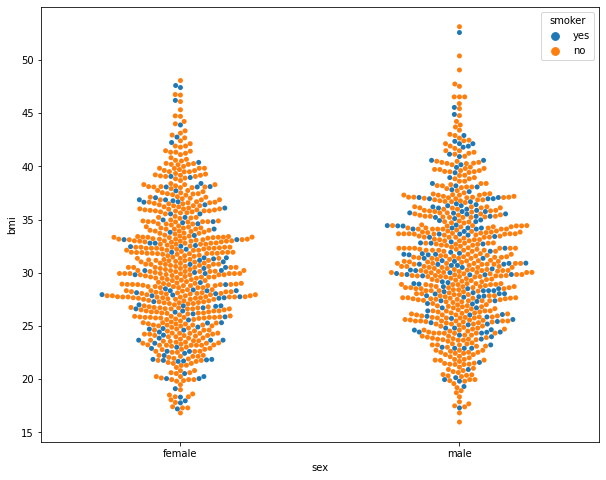

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
sns.swarmplot(x="sex", y="bmi", data=insurance_df, hue="smoker")
plt.show()


#### children & charges

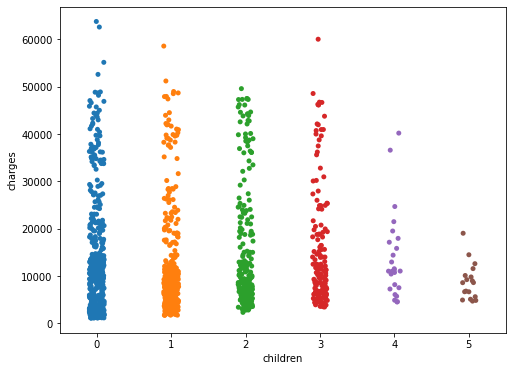

In [62]:
fig, ax = plt.subplots(figsize=(8,6))
sns.stripplot(x='children', y="charges", data=insurance_df)
plt.show()

# children 수가 증가함에 따라 오히려 charges가 감소하는 경향을 보인다.
# children 수에 따라 표본의 수가 감소하는 경향을 보인다.

### 가설 검증

1. age, bmi 가 높을수록, 그리고 smoker == 'yes' 인 경우 charges 가 높지 않을까?
    - age, bmi, smoker 는 모두 charges와 연관성을 보였다.

<br>

2. sex=='male' 인 경우가 smoker의 비중이 높지 않을까?
    - 크진 않지만 약간의 연관성을 보였다.

<br>   

3. children 이 많을 경우 더 높은 charges 를 가지지 않을까?
    - 오히려 charges가 감소하는 경향을 보였다. 가설이 틀렸다.

<br>